# 통계청 인공지능 경진대회 - 산업분류 예측하기

# 1.라이브러리 및 함수 생성

In [1]:
import re
import pandas as pd
import numpy as np
 
import seaborn as sns
import matplotlib.pyplot as plt

!pip install konlpy
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Mecab 
 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
 
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from konlpy.tag import Mecab
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, MaxPooling1D, Dense



In [2]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64


In [3]:

%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy



Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...


E: dpkg was interrupted, you must manually run 'dpkg --configure -a' to correct the problem. 


In [4]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996


Installing automake (A dependency for mecab-ko)
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...


E: dpkg was interrupted, you must manually run 'sudo dpkg --configure -a' to correct the problem. 
ERROR: Invalid requirement: '/tmp/mecab-python-0.996'
Hint: It looks like a path. File '/tmp/mecab-python-0.996' does not exist.


In [5]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
E: dpkg was interrupted, you must manually run 'dp

Installing automake (A dependency for mecab-ko)
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
E: 

In [6]:
from konlpy.tag import Mecab
mecab = Mecab()

Exception: ignored

# 2.데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

train = pd.read_csv('/content/drive/Shareddrives/통계청 인공지능 공모전/data/1. 실습용자료.txt',sep='|',encoding='EUC-KR')
Cat = pd.read_excel('/content/drive/Shareddrives/통계청 인공지능 공모전/data/한국표준산업분류(10차)_국문.xlsx',header=2)

# 3. 데이터 전처리

In [ ]:
Cat1 = Cat[["코드","항목명"]]
Cat1 = Cat1.dropna()
Cat1 = Cat1.rename(columns ={"코드":"digit_1","항목명":"digit_1_name"})
 # 2.데이터 불러오기
Cat2 = Cat[["코드.1","항목명.1"]]
Cat2 = Cat2.dropna()
Cat2 = Cat2.rename(columns ={"코드.1":"digit_2","항목명.1":"digit_2_name"})
 
Cat3 = Cat[["코드.2","항목명.2"]]
Cat3 = Cat3.dropna()
Cat3 = Cat3.rename(columns ={"코드.2":"digit_3","항목명.2":"digit_3_name"})
 
train1 = pd.merge(train,Cat1,how='left')
train2 = pd.merge(train1,Cat2,how='left')
read_data = pd.merge(train2,Cat3,how='left')

# 4.모델학습

## <대분류>

### a. 데이터전처리

In [ ]:
# text_obj, text_mthd, text_deal을 text 하나로 만들기
read_data['text'] = read_data["text_obj"].map(str)+ " " + read_data["text_mthd"].map(str)+ " " + read_data["text_deal"].map(str)

In [ ]:
# 필요한 데이터 읽어오기
new_data = read_data.loc[:, ["digit_1_name", "text"]]
# 카테고리 정수 인코딩
category_list_1 = pd.factorize(new_data['digit_1_name'])[1]
new_data['category'] = pd.factorize(new_data['digit_1_name'])[0]

In [ ]:
# 정규표현식 사용하여 문자열이 아닌 데이터(^\w)는 공백처리
new_data['text'] = new_data['text'].str.replace("[^\w]", " ")

In [ ]:
# train과 test 데이터로 split하면서 shuffle 적용
new_train, new_test, y_train, y_test = train_test_split(new_data['text'], new_data['category'], test_size=0.2, shuffle=True, random_state=23)

# y값을 원핫벡터로 변환
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# 두글자 이상의 명사추출 함수
def extractTwo(readData):
    noun = mecab.nouns(readData)
    noun_rt = []
    for i,v in enumerate(noun):
        if len(v)>1:
            noun_rt.append(v)
    return noun_rt

In [ ]:
# 토큰화
stopwords = []
 
X_train = []
for stc in new_train:
    token = []
    words = extractTwo(stc)
    for word in words:
        if word not in stopwords:
            token.append(word)
    X_train.append(token)

X_test = []
for stc in new_test:
    token = []
    words = extractTwo(stc)
    for word in words:
        if word not in stopwords:
            token.append(word)
    X_test.append(token)

In [ ]:
# 토큰화와 시퀀스의 형태로 변환
tokenizer = Tokenizer(25000)
tokenizer.fit_on_texts(X_train)
 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
max_len_1 = max(len(item) for item in X_train)
X_train = pad_sequences(X_train, maxlen=max_len_1)
X_test = pad_sequences(X_test, maxlen=max_len_1)
print("X_train:", X_train.shape)

### b.모델 생성 및 학습

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:

# 모델생성
model1 = Sequential()
model1.add(Embedding(25000, 128))
model1.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='tanh'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(LSTM(128))
model1.add(Dropout(0.2))
model1.add(Dense(19, activation='softmax'))

In [ ]:
# 모델학습
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
 
#early stopping
es = EarlyStopping(monitor='val_loss', patience=0,verbose=0,mode='min')
#validation performance 가 좋았던 모델을 저장
mc = ModelCheckpoint('best_model1.h5', monitor='val_loss', mode='min', save_best_only=True)
 
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=4, callbacks=[es,mc])

In [ ]:
model1

In [ ]:
# 손실 그래프
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()
plt.show();

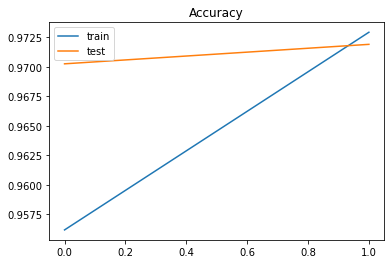

In [ ]:
# 정확도 그래프
plt.title('Accuracy')
plt.plot(history1.history['acc'], label='train')
plt.plot(history1.history['val_acc'], label='test')
plt.legend()
plt.show();

## <중분류>

### a.데이터 전처리

In [ ]:
# text_obj, text_mthd, text_deal을 text 하나로 만들기
read_data['s_digit1'] = read_data["text_obj"].map(str)+ " " + read_data["text_mthd"].map(str)+ " " + read_data["text_deal"].map(str)+ " " + read_data['digit_1_name'].map(str)

In [ ]:
# 대분류에 필요한 데이터 읽어오기
new_data2 = read_data.loc[:, ['digit_2_name', 's_digit1']]
 
# y값을 카테고리 정수로 인코딩
category_list_2 = pd.factorize(new_data2['digit_2_name'])[1]
new_data2['category'] = pd.factorize(new_data2['digit_2_name'])[0]

In [ ]:
# 정규표현식 사용하여 문자열이 아닌 데이터(^\w)는 공백처리
new_data2['s_digit1'] = new_data2['s_digit1'].str.replace("[^\w]", " ")

<ipython-input-78-6cc224ec321b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  new_data2['s_digit1'] = new_data2['s_digit1'].str.replace("[^\w]", " ")


In [ ]:
# train과 test 데이터로 split하면서 shuffle 적용
new_train, new_test, y_train, y_test = train_test_split(new_data2['s_digit1'], new_data2['category'], test_size=0.2, shuffle=True, random_state=23)
 
# y값을 원핫벡터로 변환
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# 토큰화
stopwords = []
 
X_train = []
for stc in new_train:
    token = []
    words = extractTwo(stc)
    for word in words:
        if word not in stopwords:
            token.append(word)
    X_train.append(token)

X_test = []
for stc in new_test:
    token = []
    words = extractTwo(stc)
    for word in words:
        if word not in stopwords:
            token.append(word)
    X_test.append(token)

In [ ]:
# 토큰화와 시퀀스의 형태로 변환
tokenizer = Tokenizer(25000)
tokenizer.fit_on_texts(X_train)
 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# 서로 다른 개수의 단어로 이루어진 문장을 같은 길이로 만들어주기 위해 패딩 진행
max_len_2 = max(len(item) for item in X_train)
X_train = pad_sequences(X_train, maxlen=max_len_2)
X_test = pad_sequences(X_test, maxlen=max_len_2)
print("X_train:", X_train.shape)

X_train: (800000, 31)


### b. 모델 생성 및 학습

In [ ]:
# 모델생성
model2 = Sequential()
model2.add(Embedding(25000, 128))
model2.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='tanh'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(LSTM(128))
model2.add(Dropout(0.2))
model2.add(Dense(74, activation='softmax'))

In [ ]:
# 모델학습
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
 
#early stopping
es = EarlyStopping(monitor='val_loss', patience=0,verbose=0,mode='min')
#validation performance 가 좋았던 모델을 저장
mc = ModelCheckpoint('best_model2.h5', monitor='val_loss', mode='min', save_best_only=True)
 
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=4, callbacks=[es,mc])

Epoch 1/4
12500/12500 [==============================] - 514s 41ms/step - loss: 0.2274 - acc: 0.9349 - val_loss: 0.1445 - val_acc: 0.9559
Epoch 2/4
12500/12500 [==============================] - 513s 41ms/step - loss: 0.1312 - acc: 0.9594 - val_loss: 0.1350 - val_acc: 0.9580


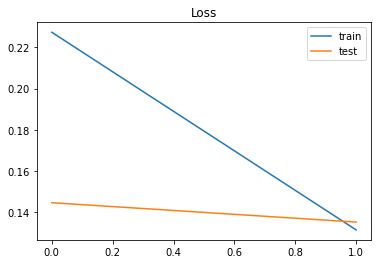

In [ ]:
# 손실 그래프
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show();

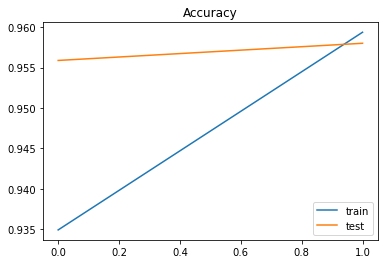

In [ ]:
# 정확도 그래프
plt.title('Accuracy')
plt.plot(history2.history['acc'], label='train')
plt.plot(history2.history['val_acc'], label='test')
plt.legend()
plt.show();

## <소분류>

### a. 데이터전처리

In [ ]:
# text_obj, text_mthd, text_deal, digit_3_name을 text 하나로 만들기
read_data['s_digit2'] = read_data["text_obj"].map(str)+ " " + read_data["text_mthd"].map(str)+ " " + read_data["text_deal"].map(str)+ " " + read_data['digit_1_name'].map(str)+ " " + read_data["digit_2_name"].map(str)

In [ ]:
# 대분류에 필요한 데이터 읽어오기
new_data3 = read_data.loc[:, ['digit_3_name', 's_digit2']]
 
# y값을 카테고리 정수로 인코딩
category_list_3 = pd.factorize(new_data3['digit_3_name'])[1]
new_data3['category'] = pd.factorize(new_data3['digit_3_name'])[0]

In [ ]:
# 정규표현식 사용하여 문자열이 아닌 데이터(^\w)는 공백처리
new_data3['s_digit2'] = new_data3['s_digit2'].str.replace("[^\w]", " ")

<ipython-input-108-b0d43292ee9b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  new_data3['s_digit2'] = new_data3['s_digit2'].str.replace("[^\w]", " ")


In [ ]:
# train과 test 데이터로 split하면서 shuffle 적용
new_train, new_test, y_train, y_test = train_test_split(new_data3['s_digit2'], new_data3['category'], test_size=0.2, shuffle=True, random_state=23)
 
# y값을 원핫벡터로 변환
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# 토큰화
stopwords = []
 
X_train = []
for stc in new_train:
    token = []
    words = extractTwo(stc)
    for word in words:
        if word not in stopwords:
            token.append(word)
    X_train.append(token)

X_test = []
for stc in new_test:
    token = []
    words = extractTwo(stc)
    for word in words:
        if word not in stopwords:
            token.append(word)
    X_test.append(token)

In [ ]:
# 토큰화와 시퀀스의 형태로 변환
tokenizer = Tokenizer(25000)
tokenizer.fit_on_texts(X_train)
 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# 서로 다른 개수의 단어로 이루어진 문장을 같은 길이로 만들어주기 위해 패딩 진행
max_len_3 = max(len(item) for item in X_train)
X_train = pad_sequences(X_train, maxlen=max_len_3)
X_test = pad_sequences(X_test, maxlen=max_len_3)
print("X_train:", X_train.shape)

X_train: (800000, 34)


### b. 모델 생성 및 학습

In [ ]:
# 모델생성
model3 = Sequential()
model3.add(Embedding(25000, 128))
model3.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='tanh'))
model3.add(MaxPooling1D(pool_size=2))
model3.add(LSTM(128))
model3.add(Dropout(0.2))
model3.add(Dense(225, activation='softmax'))

In [ ]:
# 모델학습
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
 
#early stopping
es = EarlyStopping(monitor='val_loss', patience=0,verbose=0,mode='min')
#validation performance 가 좋았던 모델을 저장
mc = ModelCheckpoint('best_model3.h5', monitor='val_loss', mode='min', save_best_only=True)
 
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=4, callbacks=[es,mc])

Epoch 1/4
12500/12500 [==============================] - 554s 44ms/step - loss: 0.3241 - acc: 0.9097 - val_loss: 0.1682 - val_acc: 0.9473
Epoch 2/4
12500/12500 [==============================] - 547s 44ms/step - loss: 0.1551 - acc: 0.9524 - val_loss: 0.1519 - val_acc: 0.9525


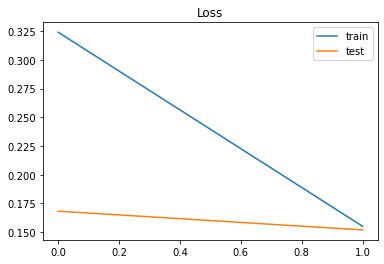

In [ ]:
# 손실 그래프
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='test')
plt.legend()
plt.show();

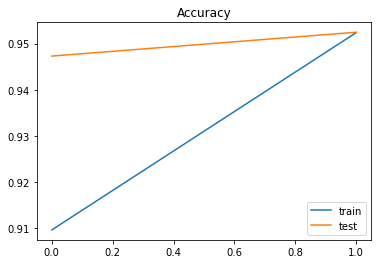

In [ ]:
# 정확도 그래프
plt.title('Accuracy')
plt.plot(history3.history['acc'], label='train')
plt.plot(history3.history['val_acc'], label='test')
plt.legend()
plt.show();

# 5. 결과출력

### a. 데이터불러오기

In [ ]:
test = pd.read_csv('2. 모델개발용자료.txt',sep='|',encoding='EUC-KR')

### b. 예측값

<대분류>

In [ ]:
test['text'] = test["text_obj"].map(str)+ " " + test["text_mthd"].map(str)+ " " + test["text_deal"].map(str)

In [ ]:
for i in test.index:
    token_stc = extractTwo(test['text'][i])
    encode_stc = tokenizer.texts_to_sequences([token_stc])
    pad_stc = pad_sequences(encode_stc, maxlen=max_len_1)
    score = model1.predict(pad_stc)
    test.at[i,'digit_1_name'] = category_list_1[score.argmax()]

In [ ]:
test = test.drop(columns=['text'])

In [ ]:
test

,AI_id,text_obj,text_mthd,text_deal,digit_1_name
0,id_000001,치킨전문점에서,고객의주문에의해,치킨판매,숙박 및 음식점업(55~56)
1,id_000002,산업공구,다른 소매업자에게,철물 수공구,도매 및 소매업(45~47)
2,id_000003,절에서,신도을 대상으로,불교단체운영,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)"
3,id_000004,영업장에서,고객요구로,자동차튜닝,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)"
4,id_000005,실내포장마차에서,접객시설을 갖추고,"소주,맥주제공",숙박 및 음식점업(55~56)
...,...,...,...,...,...
99995,id_099996,사업장에서,일반인대상으로,버섯농장,도매 및 소매업(45~47)
99996,id_099997,한의원에서,외래환자위주고,치료,보건업 및 사회복지 서비스업(86~87)
99997,id_099998,일반점포에서,소비자에게,그림판매,도매 및 소매업(45~47)
99998,id_099999,사업장에서,일반인.학생대상으로,학습공간제공,"예술, 스포츠 및 여가관련 서비스업(90~91)"


<중분류>

In [ ]:
test['s_digit1'] = test["text_obj"].map(str)+ " " + test["text_mthd"].map(str)+ " " + test["text_deal"].map(str)+ " " + test['digit_1_name'].map(str)

In [ ]:
for i in test.index:
    token_stc = extractTwo(test['s_digit1'][i])
    encode_stc = tokenizer.texts_to_sequences([token_stc])
    pad_stc = pad_sequences(encode_stc, maxlen=max_len_2)
    score = model2.predict(pad_stc)
    test.at[i,'digit_2_name'] = category_list_2[score.argmax()]

In [ ]:
test = test.drop(columns=['s_digit1'])

In [ ]:
test

,AI_id,text_obj,text_mthd,text_deal,digit_1_name,digit_2_name
0,id_000001,치킨전문점에서,고객의주문에의해,치킨판매,숙박 및 음식점업(55~56),음식점 및 주점업
1,id_000002,산업공구,다른 소매업자에게,철물 수공구,도매 및 소매업(45~47),도매 및 상품 중개업
2,id_000003,절에서,신도을 대상으로,불교단체운영,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",협회 및 단체
3,id_000004,영업장에서,고객요구로,자동차튜닝,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",개인 및 소비용품 수리업
4,id_000005,실내포장마차에서,접객시설을 갖추고,"소주,맥주제공",숙박 및 음식점업(55~56),음식점 및 주점업
...,...,...,...,...,...,...
99995,id_099996,사업장에서,일반인대상으로,버섯농장,도매 및 소매업(45~47),소매업; 자동차 제외
99996,id_099997,한의원에서,외래환자위주고,치료,보건업 및 사회복지 서비스업(86~87),보건업
99997,id_099998,일반점포에서,소비자에게,그림판매,도매 및 소매업(45~47),소매업; 자동차 제외
99998,id_099999,사업장에서,일반인.학생대상으로,학습공간제공,"예술, 스포츠 및 여가관련 서비스업(90~91)","창작, 예술 및 여가관련 서비스업"


<소분류>

In [ ]:
test['s_digit2'] = test["text_obj"].map(str)+ " " + test["text_mthd"].map(str)+ " " + test["text_deal"].map(str)+ " " + test['digit_1_name'].map(str)+ " " + test["digit_2_name"].map(str)

In [ ]:
for i in test.index:
    token_stc = extractTwo(test['s_digit2'][i])
    encode_stc = tokenizer.texts_to_sequences([token_stc])
    pad_stc = pad_sequences(encode_stc, maxlen=max_len_3)
    score = model3.predict(pad_stc)
    test.at[i,'digit_3_name'] = category_list_3[score.argmax()]

In [ ]:
test = test.drop(columns=['s_digit2'])

In [ ]:
test

,AI_id,text_obj,text_mthd,text_deal,digit_1_name,digit_2_name,digit_3_name
0,id_000001,치킨전문점에서,고객의주문에의해,치킨판매,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업
1,id_000002,산업공구,다른 소매업자에게,철물 수공구,도매 및 소매업(45~47),도매 및 상품 중개업,"건축 자재, 철물 및 난방장치 도매업"
2,id_000003,절에서,신도을 대상으로,불교단체운영,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",협회 및 단체,기타 협회 및 단체
3,id_000004,영업장에서,고객요구로,자동차튜닝,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",개인 및 소비용품 수리업,자동차 및 모터사이클 수리업
4,id_000005,실내포장마차에서,접객시설을 갖추고,"소주,맥주제공",숙박 및 음식점업(55~56),음식점 및 주점업,주점 및 비알코올 음료점업
...,...,...,...,...,...,...,...
99995,id_099996,사업장에서,일반인대상으로,버섯농장,도매 및 소매업(45~47),소매업; 자동차 제외,음ㆍ식료품 및 담배 소매업
99996,id_099997,한의원에서,외래환자위주고,치료,보건업 및 사회복지 서비스업(86~87),보건업,의원
99997,id_099998,일반점포에서,소비자에게,그림판매,도매 및 소매업(45~47),소매업; 자동차 제외,기타 상품 전문 소매업
99998,id_099999,사업장에서,일반인.학생대상으로,학습공간제공,"예술, 스포츠 및 여가관련 서비스업(90~91)","창작, 예술 및 여가관련 서비스업","도서관, 사적지 및 유사 여가관련 서비스업"


### c. 최종결과 및 제출파일저장

In [ ]:
final_test = pd.merge(test,Cat1,how='left')
final_test = pd.merge(final_test,Cat2,how='left')
final_test = pd.merge(final_test,Cat3,how='left')

In [ ]:
final_test=final_test.drop(columns=['digit_1_name','digit_2_name','digit_3_name'])

In [ ]:
final_test

,AI_id,text_obj,text_mthd,text_deal,digit_1,digit_2,digit_3
0,id_000001,치킨전문점에서,고객의주문에의해,치킨판매,I,56.0,561.0
1,id_000002,산업공구,다른 소매업자에게,철물 수공구,G,46.0,466.0
2,id_000003,절에서,신도을 대상으로,불교단체운영,S,94.0,949.0
3,id_000004,영업장에서,고객요구로,자동차튜닝,S,95.0,952.0
4,id_000005,실내포장마차에서,접객시설을 갖추고,"소주,맥주제공",I,56.0,562.0
...,...,...,...,...,...,...,...
99995,id_099996,사업장에서,일반인대상으로,버섯농장,G,47.0,472.0
99996,id_099997,한의원에서,외래환자위주고,치료,Q,86.0,862.0
99997,id_099998,일반점포에서,소비자에게,그림판매,G,47.0,478.0
99998,id_099999,사업장에서,일반인.학생대상으로,학습공간제공,R,90.0,902.0


In [ ]:
# 결과파일 저장
final_test.to_csv("산업분류 예측값.csv",sep='|',encoding='EUC-KR',index=False)